# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | mokhsogollokh
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | iwanai
Processing Record 5 of Set 1 | niafunke
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | las khorey
Processing Record 8 of Set 1 | tacna
Processing Record 9 of Set 1 | tarauaca
Processing Record 10 of Set 1 | surskoye
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | guaraniacu
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | zest'aponi
Processing Record 18 of Set 1 | molde
Processing Record 19 of Set 1 | nelson bay
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | wynyard
Processing Record 22 of Set 1 | kingston
Processing Record 23 of Set 1 |

Processing Record 40 of Set 4 | sao jose da coroa grande
Processing Record 41 of Set 4 | solleftea
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | askoy
Processing Record 44 of Set 4 | fort st. john
Processing Record 45 of Set 4 | lucapa
Processing Record 46 of Set 4 | ahau
City not found. Skipping...
Processing Record 47 of Set 4 | dan sadau
Processing Record 48 of Set 4 | cheongsong gun
Processing Record 49 of Set 4 | tabanan
Processing Record 0 of Set 5 | sumbe
Processing Record 1 of Set 5 | petropavlovsk-kamchatsky
Processing Record 2 of Set 5 | capri
Processing Record 3 of Set 5 | springbok
Processing Record 4 of Set 5 | trairi
Processing Record 5 of Set 5 | beledweyne
Processing Record 6 of Set 5 | qaqortoq
Processing Record 7 of Set 5 | el bauga
Processing Record 8 of Set 5 | humahuaca
Processing Record 9 of Set 5 | bethanie
Processing Record 10 of Set 5 | galliano
Processing Record 11 of Set 5 | kerikeri
Processing Record 12 of Set 5 | mossoro
Proce

Processing Record 31 of Set 8 | sodra sandby
Processing Record 32 of Set 8 | hasaki
Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | yeosu
Processing Record 36 of Set 8 | dedougou
Processing Record 37 of Set 8 | madison
Processing Record 38 of Set 8 | zag
Processing Record 39 of Set 8 | malango
Processing Record 40 of Set 8 | kharp
Processing Record 41 of Set 8 | gamay
Processing Record 42 of Set 8 | bani mazar
Processing Record 43 of Set 8 | las trojes
Processing Record 44 of Set 8 | sabha
Processing Record 45 of Set 8 | kanniyakumari
Processing Record 46 of Set 8 | kuytun
Processing Record 47 of Set 8 | ketchikan
Processing Record 48 of Set 8 | quepos
Processing Record 49 of Set 8 | aflou
Processing Record 0 of Set 9 | champerico
Processing Record 1 of Set 9 | smithers
Processing Record 2 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 9 | lamu
Processing Record 4 of Set 9 | berdigestyakh
Proc

Processing Record 19 of Set 12 | ambalangoda
Processing Record 20 of Set 12 | lundazi
Processing Record 21 of Set 12 | lapaha
City not found. Skipping...
Processing Record 22 of Set 12 | chambas
Processing Record 23 of Set 12 | usogorsk
Processing Record 24 of Set 12 | tobruk
Processing Record 25 of Set 12 | princeville
Processing Record 26 of Set 12 | guayaramerin
Processing Record 27 of Set 12 | betio village
Processing Record 28 of Set 12 | gafanha da nazare
Processing Record 29 of Set 12 | kolonia town
Processing Record 30 of Set 12 | codrington
Processing Record 31 of Set 12 | acapulco de juarez
Processing Record 32 of Set 12 | tandil
Processing Record 33 of Set 12 | millau
Processing Record 34 of Set 12 | pecos
Processing Record 35 of Set 12 | durango
Processing Record 36 of Set 12 | el quebrachal
Processing Record 37 of Set 12 | purranque
Processing Record 38 of Set 12 | balabac
Processing Record 39 of Set 12 | briancon
Processing Record 40 of Set 12 | alta
Processing Record 41 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.76,99,100,7.88,TF,1707273361
1,mokhsogollokh,61.4681,128.9203,-24.05,95,100,0.65,RU,1707273361
2,saipan,15.1355,145.7010,29.39,54,75,5.66,MP,1707273361
3,iwanai,42.9744,140.5089,0.08,66,99,3.01,JP,1707273361
4,niafunke,15.9322,-3.9906,19.25,14,0,5.12,ML,1707273361


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.76,99,100,7.88,TF,1707273361
1,mokhsogollokh,61.4681,128.9203,-24.05,95,100,0.65,RU,1707273361
2,saipan,15.1355,145.7010,29.39,54,75,5.66,MP,1707273361
3,iwanai,42.9744,140.5089,0.08,66,99,3.01,JP,1707273361
4,niafunke,15.9322,-3.9906,19.25,14,0,5.12,ML,1707273361


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

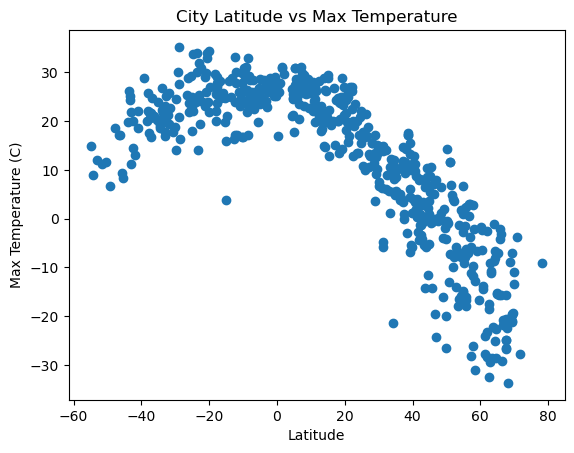

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

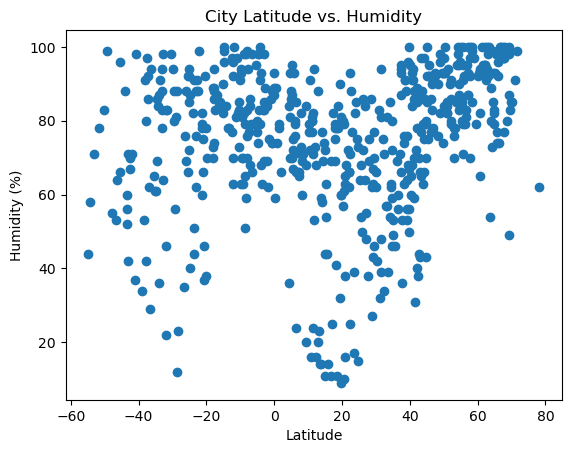

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

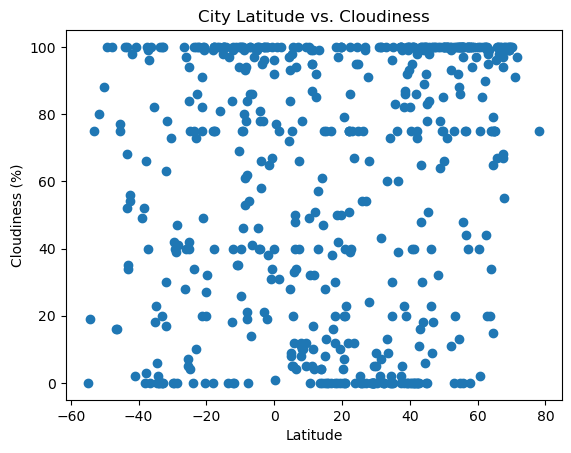

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

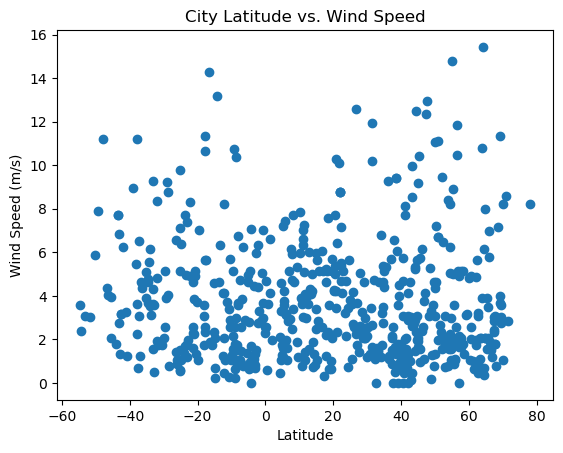

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# function written with help from David Czoper
def linear_regression(x_values,y_values,xlabel,ylabel):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    
    regress_line=x_values*slope+intercept
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_line, "r-")
    
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    print(f"The r-value is: {rvalue}")
    
    plt.show()
    



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mokhsogollokh,61.4681,128.9203,-24.05,95,100,0.65,RU,1707273361
2,saipan,15.1355,145.7010,29.39,54,75,5.66,MP,1707273361
3,iwanai,42.9744,140.5089,0.08,66,99,3.01,JP,1707273361
4,niafunke,15.9322,-3.9906,19.25,14,0,5.12,ML,1707273361
6,las khorey,11.1595,48.1967,24.45,80,5,3.03,SO,1707273361


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.76,99,100,7.88,TF,1707273361
5,grytviken,-54.2811,-36.5092,8.86,58,19,2.37,GS,1707273361
7,tacna,-18.0056,-70.2483,22.11,73,0,3.09,PE,1707273361
8,tarauaca,-8.1614,-70.7656,22.84,99,21,1.03,BR,1707273361
11,puerto natales,-51.7236,-72.4875,11.13,78,80,3.04,CL,1707273307


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8937938221943345


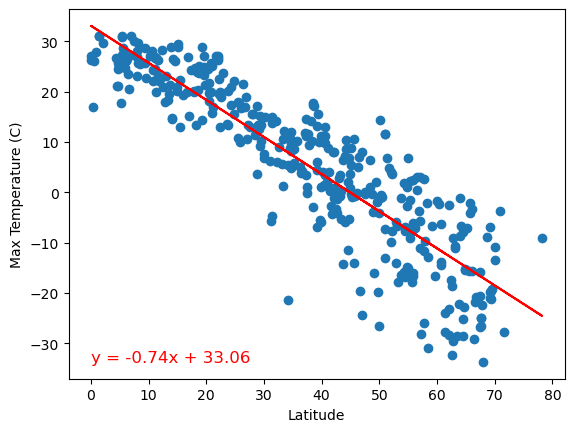

In [18]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temperature (C)')

The r-value is: 0.5170959873036682


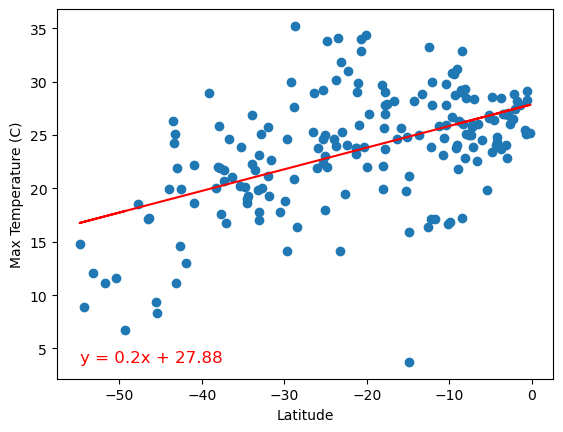

In [19]:
# Linear regression on Southern Hemisphere

linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temperature (C)')

**Discussion about the linear relationship:** Both plots have a clear trend, the trend for the northern hemisphere matches the regression line much more closely, although it is not exact.  The southern hemisphere trend does not really correlate with the regression line, demonstrated by the low R squared value.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4554775000563074


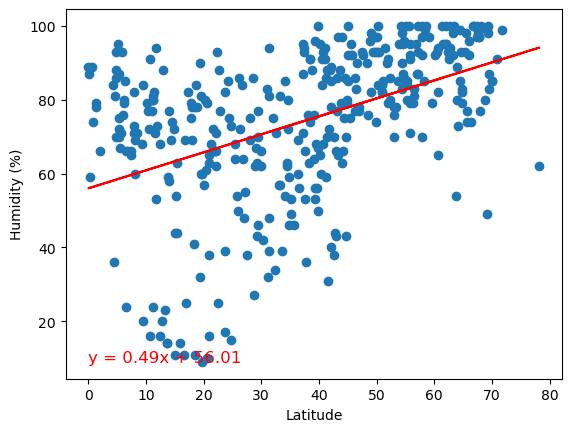

In [20]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity (%)')

The r-value is: 0.29872890879682745


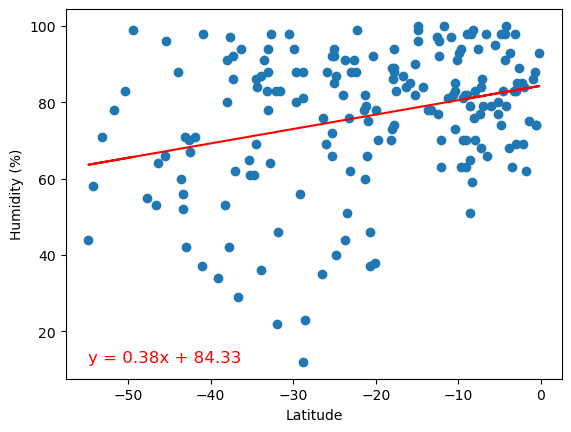

In [21]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity (%)')

**Discussion about the linear relationship:** Neither hemisphere has a strong trend that matches a linear regression, although both plots seem to show higher humidity closer to a latitude of 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.37723098654026105


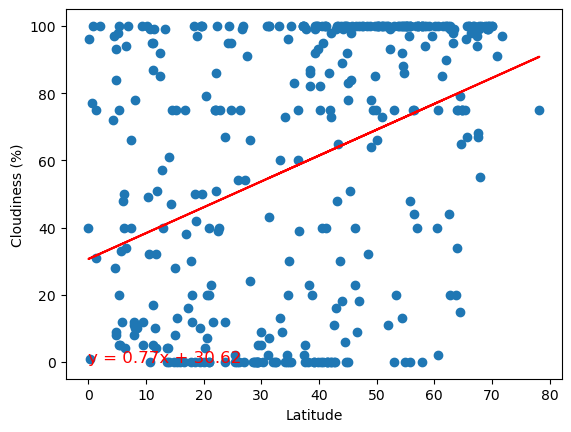

In [22]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)')

The r-value is: 0.22805562000660629


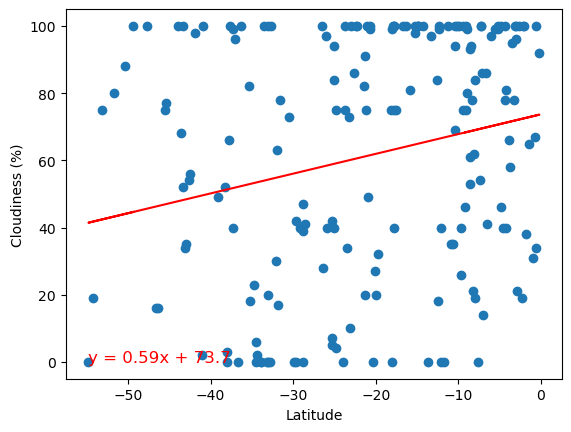

In [23]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)')

**Discussion about the linear relationship:** Neither hemisphere plot shows the data correlating to a linear regression model.  The plots do show that the cloudiness seems to cluster around the two extremes (100 and 0).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0018201059371553963


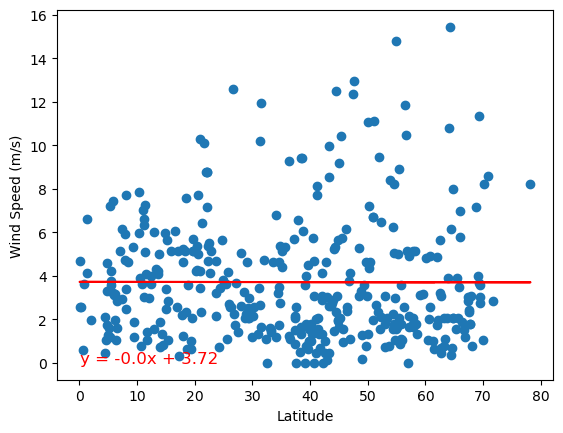

In [24]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)')

The r-value is: -0.17932720547182007


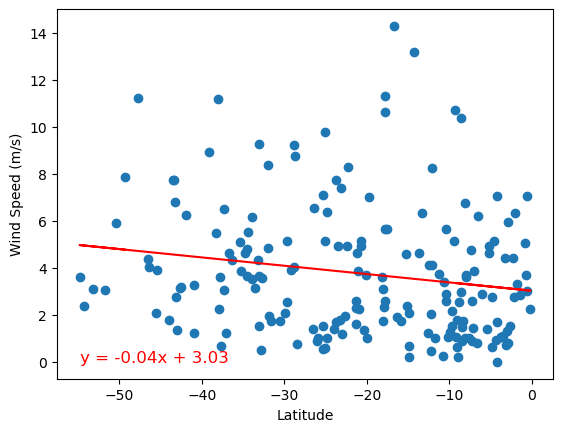

In [25]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)')

**Discussion about the linear relationship:** Neither plot shows a correlation to the linear regression model and both plots show that the wind speed tends to be in a lower range and high numbers are more like outliers than a usual data point.  